# Desenvolvimento

## Python

Para este trabalho estamos utilizando a liguagem de programação [Python](https://www.python.org/), na versão 3.6, a decisão de utilizar essa linguagem é devido ao fato de que ela já oferece muitas bibliotecas que auxiliam na criação de modelos de aprendizado de máquina. Nas próximas seções listaremos as bibliotecas utilizadas para este projeto.

## Bibliotecas

### Numpy
A biblioteca [Numpy](http://www.numpy.org/) é essêncial para realização de cálculos matemáticos e a maniputação de arrays multidimensionais.
### Matplotlib
A bibliteca [Matplotlib](https://matplotlib.org/) será utilizada para a criação dos gráficos que serão apresentados ao longo do projeto. 
### Pandas
A biblioteca [Pandas](http://pandas.pydata.org/) é uma ferramente muito poderosa para realizar análise de dados.

## Base de Dados

Para o desenvolvimento do nosso modelo estaremos utilizando uma base de dados disponível no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).
Os dados correspondem aos gastos anuais dos clientes de um distribuidor de produtos para atacados. As informações disponíveis são:

* Fresh: Gastos anuais com produtos frescos;
* Milk: Gastos anuais com produtos derivados de leite;
* Grocery: Gastos anuais com produtos comestíveis;
* Frozen: Gastos anuais com produtos congelados;
* Detergents_paper: Gastos anuais com produtos de limpeza;
* Delicassen: Gastos anuais com especiarias;
* Chanel: Tipo de estabelecimento do cliente (Hotel/Restaurante/Café);
* Region: Região do cliente;

Para este trabalho não estaremos utilizando os dados Chanel e nem Region.

In [1]:
# Importação das bibliotecas 
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

# Lê os dados do arquivo CSV
dataset = pd.read_csv('../resources/dataset/customers.csv')
# Exclui as colunas Region e Channel, mantendo o nome das outras colunas
dataset.drop(['Region', 'Channel'], axis = 1, inplace = True)

## Observação dos dados

Entender os dados que estão sendo analisados é extremamente importante para montar um modelo de aprendizado eficiente. A base de dados é composta por 6 atributos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicassen'**. Cada atributo representa uma categoria de produtos vendidos pela distribuidora. Na tabela abaixo estão algumas estatísticas extraídas da base de dados:

In [2]:
# Exibe a descrição dos dados
display(dataset.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Para ter melhor entendimento da base de dados, selecionamos uma amostra aleatóriamente para ser analisada separadamente.

In [6]:
# Seleção das amostras
samples_index = [60]

# DataFrame com as amostras selecionadas
samples = pd.DataFrame(dataset.iloc[samples_index], columns = dataset.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8590,3045,7854,96,4095,225


### Análise dos dados

Cada uma das amostras selecionadas representam um cliente, com base na tabela de descrições estatísticas é possível analisar e entender o perfil destes dois clientes selecionados.

#### Análise do cliente

A principal compra do primeiro cliente é Fresh, com 8590. A média de compras nesta categoria é de 12000, ou seja, apesar de fresh ser sua principal compra ele está bem abaixo da média, está um pouco acima do segundo quartil que é 8504.
Sua segunda maior compra é de Grocery, com 7854. A média de compras nesta categoria é de 7951, ele está próximo da média de compradores desta categoria, ele pertence ao segundo quartil com valor de 4755.
Em terceiro lugar é Detergents_Paper, com 4095. A média de compras nesta categoria é de 2881, ele se encontra acima da média, e está bem acima do terceiro quartil que é 3922. Isso significa que apesar desta categoria não ser sua maior despesa ele é um dos clientes que tem mais gastos com esta categoria.
Em quarto lugar está a categoria Milk, com 3045. Este valor está abaixo da média desta categoria que é 5796 e se encaixa no primeiro quartil de compradores.
Delicassen está em penúltimo lugar em suas compras, com o valor de 225, muito abaixo da média que é 1524 e dentro do primeiro quartil de compradores.
Em último lugar está Frozen com um gasto de 96, muito abaixo da média e um pouco acima do mínimo gasto com nesta categoria, isso significa que este cliente quase não compra produtos desta categoria.
Com base na análise acima podemos então concluir que este cliente tem o perfil de um pequeno mercado de bairro, ou uma loja de convêniencia, pois seus gastos na grande maioria está abaixo da média em todas as categorias. Mesmo em Fresh, que é sua principal compra esse cliente está abaixo da média. E pela distribuição de compras percebe-se que é uma compra balanceada.

Este foi um exemplo de como seria feito a análise de um cliente para definir seu perfil e segmentar em grupos distintos, neste caso analisamos somente um cliente e segmentamos ele em 'loja de conveniência', com base em seus gastos nas 6 categorias. Porém nesta base de dados temos no total 440 amostras, fazer esta análise manualmente um por um é tedioso e pode gerar margem ao erro. A proposta deste tabalho é utilizar aprendizado de máquina para realizar está análise através do algoritmo de agrupamento k-means.

## Distribuição dos atributos

Outra maneira simples de analisar o conjunto de dados é vizualisar uma matriz de dispersão, com ela é capaz de descobrir rapidamente se existe alguma correlação entre as categorias de produtos.

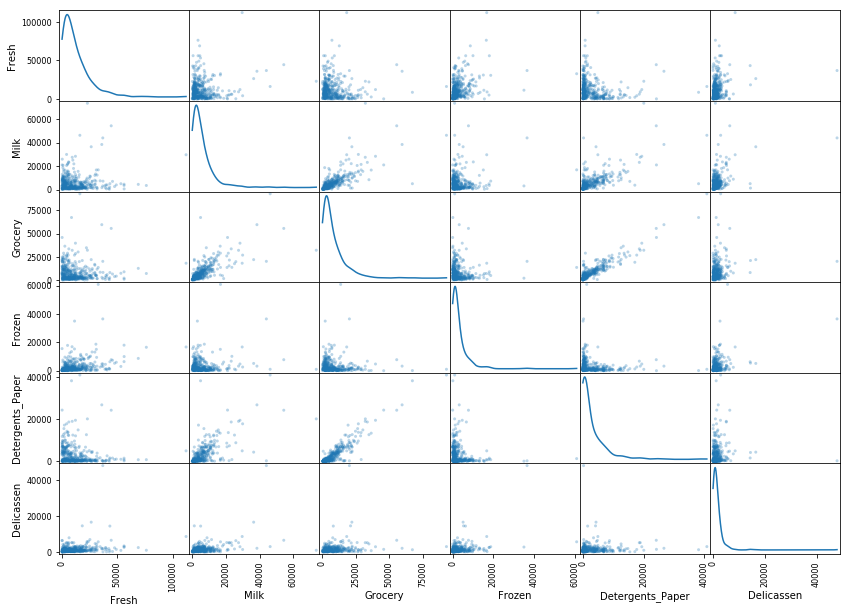

In [4]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

Na matriz de dispersão podemos notar que o gráfico das categorias "Detergents_Paper" e "Grocery" formam um gráfico quase linear, isso significa que há uma relação entre eles. Ou seja, um cliente que compre produtos da categoria "Detergent_Paper" tem uma probabilidade maior de comprar produtos da categoria "Grocery" também. Existe uma relação parecida, porém pequena, entre as categorias "Grocery" e "Milk", mas a linearidade do gráfico não é tão visivel.

# Pré-processamento dos Dados

## Escalonando os valores

Antes de submeter o conjunto de dados ao algoritmo k-means precisamos colocar nossos dados na mesma escala, pois isso 

C:\Users\Erick\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


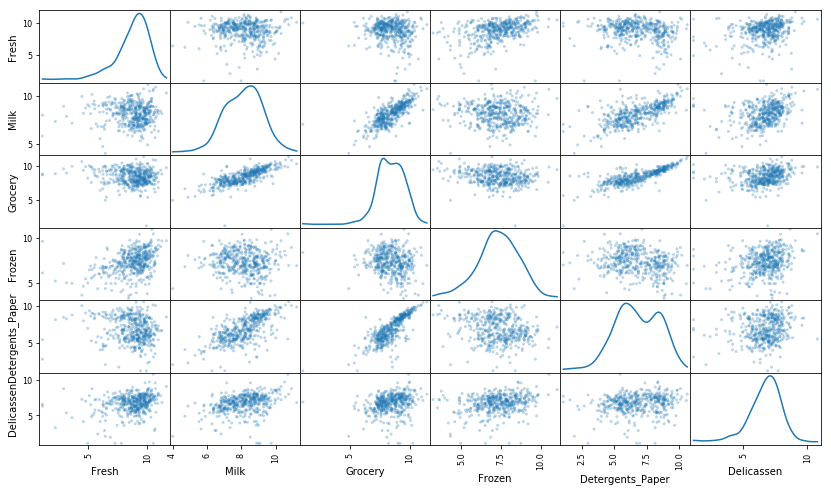

In [8]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(dataset)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [9]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.058354,8.021256,8.968778,4.564348,8.317522,5.4161
